In [21]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
from sklearn import datasets, linear_model

diabetes = datasets.load_diabetes()
X=diabetes.data
y= diabetes.target


In [61]:
nsamp, natt = X.shape
print("num samples={0:d} num attributes={1:d}".format(nsampp,natt))

num samples=442 num attributes=10


In [39]:
ym = np.mean(y)
syy = np.mean((y-ym)**2)
Rsq = np.zeros(natt)
beta0 = np.zeros(natt)
beta1 = np.zeros(natt)
for k in range(natt):
    xm = np.mean(X[:,k])
    sxy = np.mean((X[:,k]-xm)*(y-ym))
    sxx = np.mean((X[:,k]-xm)**2)
    beta1[k]= sxy/sxx
    beta0[k]=ym-beta1[k]*xm
    Rsq[k]=(sxy)**2/sxx/syy

    print("{0:2d} Rsq ={1:f} beta0={2:f} beta1={3:f}".format(k,Rsq[k],beta0[k],beta1[k]))


 0 Rsq =0.035302 beta0=152.133484 beta1=304.183075
 1 Rsq =0.001854 beta0=152.133484 beta1=69.715356
 2 Rsq =0.343924 beta0=152.133484 beta1=949.435260
 3 Rsq =0.194908 beta0=152.133484 beta1=714.741644
 4 Rsq =0.044954 beta0=152.133484 beta1=343.254452
 5 Rsq =0.030295 beta0=152.133484 beta1=281.784593
 6 Rsq =0.155859 beta0=152.133484 beta1=-639.145279
 7 Rsq =0.185290 beta0=152.133484 beta1=696.883030
 8 Rsq =0.320224 beta0=152.133484 beta1=916.138723
 9 Rsq =0.146294 beta0=152.133484 beta1=619.222821


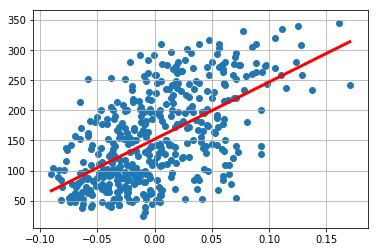

In [49]:
imax = np.argmax(Rsq)
xmin = np.min(X[:,imax])
xmax = np.max(X[:,imax])
ymin = beta0[imax]+beta1[imax]*xmin
ymax = beta0[imax]+beta1[imax]*xmax
plt.plot([xmin,xmax], [ymin,ymax],'r-',linewidth = 3)

plt.scatter(X[:,imax],y)
plt.grid()

In [55]:
ym = np.mean(y)
y1 = y-ym
Xm = np.mean(X,axis=0)
X1 = X-Xm[None,:]

syy = np.mean(y1**2)
sxx=np.mean(X1**2)
sxy = np.mean(X1*y1[:,None],axis=0)

beta1 = sxy/sxx
beta0 = ym - beta1*Xm

Rsq = sxy**2/sxx/syy

In [57]:
for k in range(natt):
    print("{0:2d} Rsq={1:f} beta0={2:f} beta1={3:f}".format(k,Rsq[k],beta0[k],beta1[k]))

 0 Rsq=0.035302 beta0=152.133484 beta1=304.183075
 1 Rsq=0.001854 beta0=152.133484 beta1=69.715356
 2 Rsq=0.343924 beta0=152.133484 beta1=949.435260
 3 Rsq=0.194908 beta0=152.133484 beta1=714.741644
 4 Rsq=0.044954 beta0=152.133484 beta1=343.254452
 5 Rsq=0.030295 beta0=152.133484 beta1=281.784593
 6 Rsq=0.155859 beta0=152.133484 beta1=-639.145279
 7 Rsq=0.185290 beta0=152.133484 beta1=696.883030
 8 Rsq=0.320224 beta0=152.133484 beta1=916.138723
 9 Rsq=0.146294 beta0=152.133484 beta1=619.222821


In [64]:
ns_train = 300
ns_test = nsamp - ns_train
x_tr = X[:ns_train, :]
y_tr = y[:ns_train]

In [67]:
regr = linear_model.LinearRegression()
regr.fit(x_tr,y_tr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [70]:
regr.intercept_

152.34786451820108

In [72]:
regr.coef_

array([ -16.57607993, -254.66532396,  560.98630022,  278.91811152,
       -393.41357305,   97.05460405,  -19.0023093 ,  169.46450327,
        632.95050374,  114.21638941])

In [75]:
y_tr_predict = regr.predict(x_tr)
RSS_tr = np.mean((y_tr_predict-y_tr)**2)/(np.std(y_tr)**2)
Rsq_tr = 1-RSS_tr
print("RSS per sample = {0:f}".format(RSS_tr))
print("R^2 =            {0:f}".format(Rsq_tr))

RSS per sample = 0.485281
R^2 =            0.514719


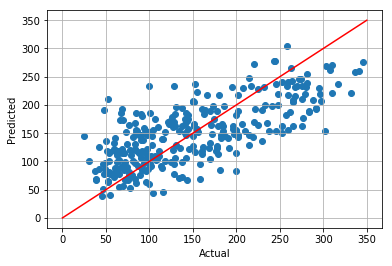

In [79]:
plt.scatter(y_tr,y_tr_predict)
plt.plot([0,350],[0,350],"r")
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid()

In [84]:
x_test = X[ns_train:,:]
y_test = y[ns_train:]
y_test_predict = regr.predict(x_test)
RSS_test = np.mean((y_test_predict-y_test)**2)/(np.std(y_test)**2)
Rsq_test = 1 - RSS_test
print("RSS per sample = {0:f}".format(RSS_test))
print("R^2            = {0:f}".format(Rsq_test))

RSS per sample = 0.492801
R^2            = 0.507199


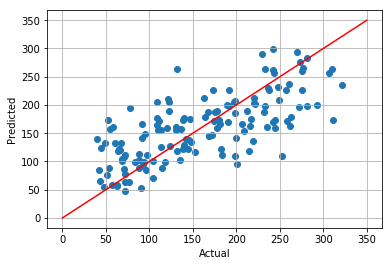

In [86]:
plt.scatter(y_test,y_test_predict)
plt.plot([0,350],[0,350],"r")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.grid()

In [90]:
ones = np.ones((ns_train,1))
A = np.hstack((ones,x_tr))
A.shape

(300, 11)

In [99]:
out = np.linalg.lstsq(A,y_tr,rcond=None)
beta = out[0]

In [101]:
beta

array([ 152.34786452,  -16.57607993, -254.66532396,  560.98630022,
        278.91811152, -393.41357305,   97.05460405,  -19.0023093 ,
        169.46450327,  632.95050374,  114.21638941])

In [103]:
regr.intercept_

152.34786451820108

In [106]:
regr.coef_

array([ -16.57607993, -254.66532396,  560.98630022,  278.91811152,
       -393.41357305,   97.05460405,  -19.0023093 ,  169.46450327,
        632.95050374,  114.21638941])

In [108]:
Am = np.matrix(A)
ym = np.matrix(y_tr)
ym = np.transpose(ym)
Amt = np.transpose(Am)

In [110]:
beta = np.linalg.inv(Amt*Am)*Amt*ym

In [113]:
ym

matrix([[151.],
        [ 75.],
        [141.],
        [206.],
        [135.],
        [ 97.],
        [138.],
        [ 63.],
        [110.],
        [310.],
        [101.],
        [ 69.],
        [179.],
        [185.],
        [118.],
        [171.],
        [166.],
        [144.],
        [ 97.],
        [168.],
        [ 68.],
        [ 49.],
        [ 68.],
        [245.],
        [184.],
        [202.],
        [137.],
        [ 85.],
        [131.],
        [283.],
        [129.],
        [ 59.],
        [341.],
        [ 87.],
        [ 65.],
        [102.],
        [265.],
        [276.],
        [252.],
        [ 90.],
        [100.],
        [ 55.],
        [ 61.],
        [ 92.],
        [259.],
        [ 53.],
        [190.],
        [142.],
        [ 75.],
        [142.],
        [155.],
        [225.],
        [ 59.],
        [104.],
        [182.],
        [128.],
        [ 52.],
        [ 37.],
        [170.],
        [170.],
        [ 61.],
        [144.],
        

In [121]:
X = np.arange(24).reshape(2,3,4)  # shape = (2,3,4)
Y1 = np.sum(X,axis=0)             # shape = (3,4)
Y2 = np.sum(X,axis=1)             # shape = (2,4)

print('X')
print(X)



X
[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]


In [123]:
Y1

array([[12, 14, 16, 18],
       [20, 22, 24, 26],
       [28, 30, 32, 34]])

In [127]:
X = np.random.rand(4,3)
Y = X/np.sum(X)
print(Y)

[[0.07057996 0.04517132 0.1261164 ]
 [0.12377477 0.06722686 0.12094171]
 [0.06458237 0.07550795 0.06093043]
 [0.11313205 0.00579399 0.12624218]]


In [153]:
X = np.random.rand(5,3)
d = np.random.rand(5)
print(X)
print(d)
Y = np.dot(d[None],X)

[[0.57229209 0.51886804 0.89700348]
 [0.01422355 0.72648356 0.65227728]
 [0.82246149 0.86358214 0.9777094 ]
 [0.47905866 0.56293583 0.06327408]
 [0.85989793 0.24332262 0.89995652]]
[0.61680917 0.93200973 0.7556121  0.53131242 0.11523039]


In [152]:
Y

array([[2.03731059, 1.1706406 , 1.47213804]])